In [1]:
#import warnings
#warnings.filterwarnings('ignore') # make the notebook nicer

In [4]:
#conda install -c ambermd pytraj
#conda install -c bioconda nglview
#jupyter-nbextension enable nglview --py --sys-prefix
#%matplotlib widget

In [27]:
#interactive 
import pytraj as pt
import nglview as nv
from subprocess import call
f = open("helix.pdb", "w")
call(["./fd_helix", "abdna","aaaaaaaaaa"], stdout=f)
traj = pt.load('helix.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [28]:
view.render_image()

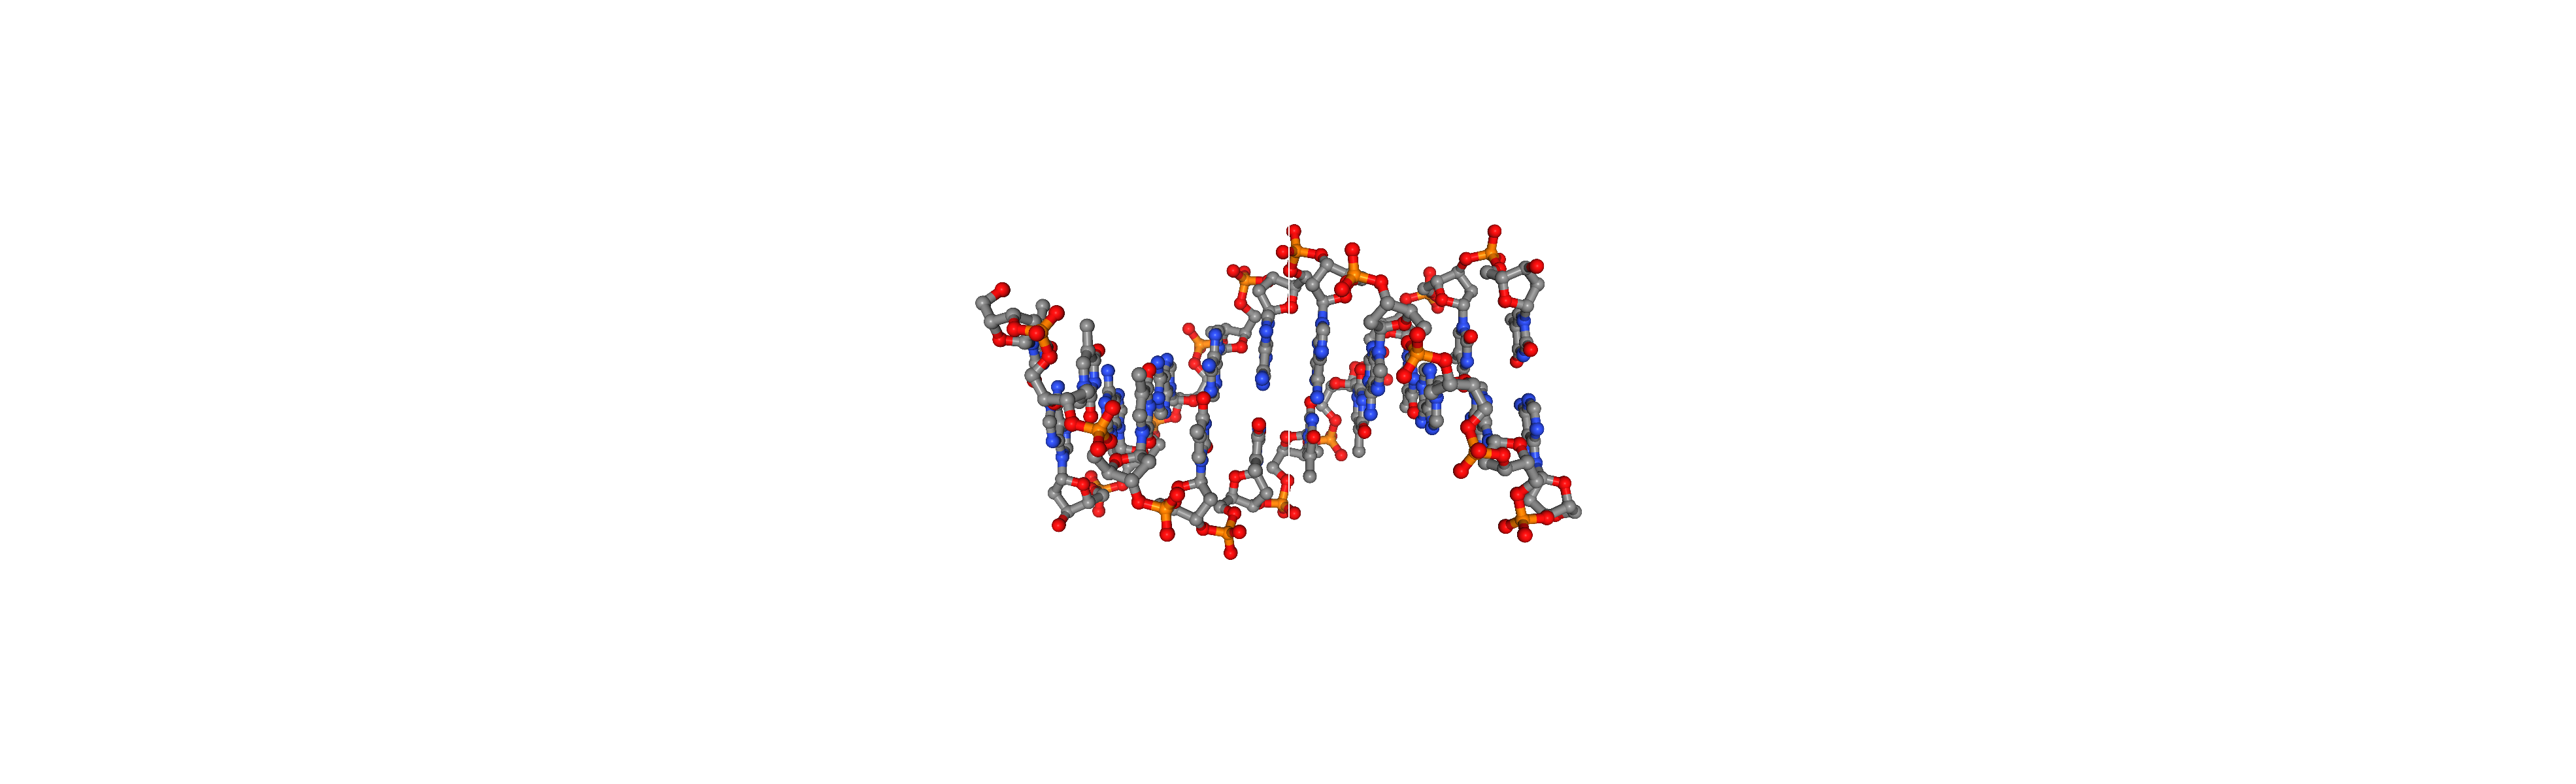

In [30]:
# static image
view._display_image()

In [35]:
!wget 'https://raw.githubusercontent.com/openmm/openmmforcefields/master/amber/ffxml/DNA.bsc1.xml'

--2020-04-12 17:48:25--  https://raw.githubusercontent.com/openmm/openmmforcefields/master/amber/ffxml/DNA.bsc1.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105652 (103K) [text/plain]
Saving to: ‘DNA.bsc1.xml.3’

DNA.bsc1.xml.3      100%[===================>] 103.18K  --.-KB/s    in 0.03s   

2020-04-12 17:48:25 (3.24 MB/s) - ‘DNA.bsc1.xml.3’ saved [105652/105652]



In [65]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

pdb = PDBFile('helix.pdb')
forcefield = ForceField('DNA.bsc1.xml')
#forcedield=ForceField('DNA.bsc1.xml, tip3p.xml')

In [66]:
pdb.getTopology()

<Topology; 2 chains, 20 residues, 404 atoms, 452 bonds>

In [90]:
modeller = Modeller (pdb.topology, pdb.positions)
modeller.addHydrogens (forcefield)
modeller.getTopology()

<Topology; 2 chains, 20 residues, 638 atoms, 686 bonds>

In [165]:
integrator = VerletIntegrator(.003*picoseconds)

In [166]:
system = forcefield.createSystem(modeller.topology)
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)

In [167]:
simulation.minimizeEnergy()
simulation.reporters.append(PDBReporter('output.pdb',1))
simulation.reporters.append(StateDataReporter(stdout, 1, step=True,potentialEnergy=True, temperature=True))
simulation.step(100)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1,757.2835324016091,0.046691055978380094
2,757.0097319830534,0.0799681344965572
3,756.9994280216645,0.09553486842673117
4,757.0219880678094,0.12238498173054238
5,757.3939207453243,0.1634548486939314
6,759.2666449490393,0.21219080536519264
7,765.4498175022297,0.3035645054541554
8,785.2273470085665,0.54300112903407
9,848.3801253583599,1.2540212265709674
10,1049.7357080002735,3.527659406945225
11,1701.7711696380004,10.79800201418545
12,3802.2216915598956,38.309539385434086
13,11220.492028266817,129.0952592342532
14,13077.960179733194,1265.4581808374264
15,49925.87993604595,1903.9694850119326
16,142960.24025834954,1006.5991343248555
17,259520.61160834983,992.3540959926353
18,446990.1254007746,2149.4367785946242
19,875296.094713284,4490.264765355384
20,1827702.584377618,12082.382641074662
21,4830764.452767902,341447762.84581137
22,26091520061.185955,328564761.0812927
23,18600649971.945255,51227098168.395454
24,3875507358656.0854,4845650

ValueError: coordinate "-51477514.28532404" could not be represented in a width-8 field

In [190]:
pdbfile.PDBFile.writeModel(modeller.topology,modeller.positions,open('output.pdb','w'))

In [191]:
traj = pt.load('output.pdb')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [ ]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds)
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

simulation.reporters.append(PDBReporter('output.pdb', 10))
simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(2000)